In [23]:
#librerie
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from google.colab import drive
from scipy import integrate
from time import sleep
from tqdm import tqdm

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path_to_file="drive/MyDrive/Lab HPGE/Data/Ge_Ba133_2000_g100_1.xml"  #change this 



tree = ET.parse(path_to_file) 
root=tree.getroot()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
list=[]

#output of the code below: a list of events and each event is a list of 8192 samples  

for event in root.findall("event"):  #this finds all the event in the file
    string_event=event.find("trace").text  #this takes all the samples for each event
    int_event=[int(string_number) for string_number in string_event.split()] #splitting and casting to int
    list.append(int_event)
    #if(len(list)>15000):
    #   break                      #this part was used to manually undersample the Nai_Cesio1.xml file (too big) 

In [14]:
sample_space=10e-9 #10 ns
samples_per_event=len(list[0]) # 8192

evento=75 #pick an event to plot below

x=np.linspace(sample_space,samples_per_event*sample_space,samples_per_event)  # from 10 ns to 8192*10 ns 
z=np.linspace(1,len(list[evento]),num=len(list[evento])) # from 1 to 8192

In [9]:
list_event=np.array(list) # casting to a numpy array

In [ ]:
# RUN THIS ONLY FOR NaI and if you want to rotate the plot otherwise just skip this block
background_value_NaI=list_event[0,0] 
list_event-=background_value_NaI             #don't know if this is usefull for the Nai part 
list_event*=(-1)

In [11]:
#Saturazione

K=16383

maxima_peaks=np.zeros(len(list))
list_event.max(axis=1,out=maxima_peaks)

index_saturated=[i for i in range(len(maxima_peaks)) if(maxima_peaks[i]==K)]
len(index_saturated)
print(index_saturated)

[1, 2, 3, 6, 7, 17, 19, 25, 33, 39, 43, 61, 74, 76, 78, 83, 87, 89, 92, 101, 103, 105, 126, 130, 136, 138, 146, 162, 168, 177, 187, 191, 197, 199, 216, 218, 219, 223, 251, 261, 263, 264, 271, 291, 296, 302, 306, 309, 318, 320, 323, 327, 344, 346, 354, 355, 356, 366, 368, 381, 384, 387, 388, 394, 403, 409, 429, 437, 444, 450, 460, 463, 469, 478, 480, 481, 502, 505, 509, 510, 517, 523, 536, 544, 545, 547, 552, 556, 570, 584, 586, 590, 613, 616, 617, 619, 628, 638, 641, 643, 648, 658, 660, 670, 674, 676, 679, 690, 703, 704, 717, 734, 743, 754, 766, 776, 777, 785, 788, 791, 795, 798, 806, 813, 816, 818, 823, 831, 833, 845, 847, 848, 860, 862, 865, 880, 884, 888, 891, 906, 911, 918, 934, 956, 960, 975, 997, 999, 1004, 1008, 1010, 1016, 1018, 1021, 1029, 1033, 1035, 1040, 1056, 1065, 1073, 1076, 1081, 1089, 1106, 1109, 1111, 1115, 1118, 1139, 1149, 1152, 1156, 1163, 1169, 1176, 1178, 1183, 1187, 1194, 1202, 1209, 1210, 1214, 1217, 1224, 1225, 1230, 1234, 1251, 1252, 1269, 1281, 1287, 1291, 1

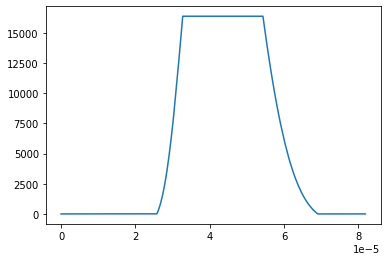

In [20]:
evento=index_saturated[8]

plt.plot(x,list_event[evento])
#plt.xlim(3.1e-5,3.6e-5)
#plt.ylim(0,16384)

5433


ValueError: ignored

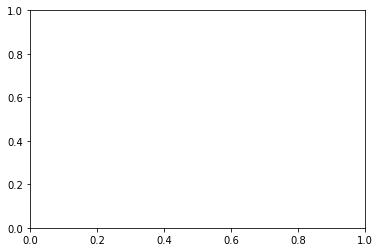

In [21]:
prova=list_event[evento]

plateau_points=[i for i in range(len(prova)) if(prova[i]==K)]

len_K=len(plateau_points)

small_points_sx=[i for i in range(len(prova)) if(prova[i]<50 and i<plateau_points[0])]
small_points_dx=[i for i in range(len(prova)) if(prova[i]<50 and i>plateau_points[len_K-1])]

print(plateau_points[len_K-1])

graph_sx=[prova[i] for i in range(plateau_points[0]) if(prova[i]>50 and prova[i]<K)]
graph_dx=[prova[i] for i in range(plateau_points[len_K-1],len(prova)) if(prova[i]>50 and prova[i]<K)]


sx=np.linspace(len_K,plateau_points[0],plateau_points[0]-len(small_points_sx)-1)
dx=np.linspace(plateau_points[len_K-1],len(prova)-len(small_points_dx),len(prova)-len(small_points_dx)-plateau_points[len_K-1]-1)

x_fin=np.zeros(len(sx)+len(dx))
np.concatenate((sx,dx),out=x_fin)
graph=np.zeros(len(graph_sx)+len(graph_dx))
np.concatenate((graph_sx,graph_dx),out=graph)


graph=np.array(graph)


plt.plot(x_fin,graph,ls="",marker=".")

In [22]:
#FIT GAUSSIANO

from numpy import exp, linspace, random

def gaussian(x, N, mu, sigma):
    return N * exp(-(x-mu)**2 /(2*sigma**2))


from scipy.optimize import curve_fit

init_vals = [16000, 4500, 4000 ]  # for [N, mu, wid]

best_vals, covar = curve_fit(gaussian, x_fin, graph,p0=init_vals) 

plt.plot(x_fin,graph,ls="",marker=".")
plt.plot(z,gaussian(z,best_vals[0],best_vals[1],best_vals[2]))

ValueError: ignored

In [ ]:
#integral of each event 
values_integrals=[integrate.trapz(event,x) for event in list_event]

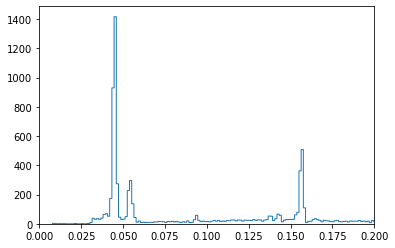

In [ ]:
#histogram of the spectrum

numb_bins=600  #try to change this maybe

plt.hist(values_integrals,bins=numb_bins,histtype="step")
#plt.ylim(0,400)   #to cut the y axis 
plt.xlim(0.0,0.2)
plt.show()

In [ ]:
values_new_integrals=np.zeros(len(list))
for i in range(len(list)):
  if (values_integrals[i] > 0.0438):
    values_new_integrals[i]= values_integrals[i]
print(values_new_integrals)    

[0.70895038 0.7078509  0.70623791 ... 0.71160585 0.71143451 0.7111344 ]


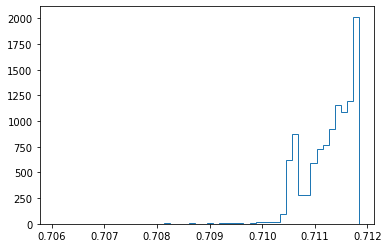

In [ ]:
#histogram of the spectrum

numb_bins=50  #try to change this maybe

plt.hist(values_new_integrals,bins=numb_bins,histtype="step")
plt.show()
#plt.ylim(0,400)   #to cut the y axis 
#plt.xlim(0.65,0.9)

In [ ]:
#codice per lo spettro in FREQUENZA
#utile per analisi del rumore

def spettro(f):
    N = len(f)                       # Lunghezza del vettore di partenza
    Nf = int( N / 2 )                # Frequenza di Nyquist
    sp = np.zeros(Nf+1)              # Vettore di output contenente lo spettro
    ak = np.fft.rfft(f) / N          # Trasformata del vettore di partenza (normalizzata!)
    for n in range(Nf+1):
        if n == 0:
            sp[n] = np.square(np.abs(ak[n]))
        else:
            sp[n] = 2.0 * np.square(np.abs(ak[n]))
    return  sp

def w(f):
  N = len(f)                       
  Nf = int( N / 2 ) 
  om = np.linspace(0.0, Nf, Nf+1)  # Vettore di output contenente le frequenze
  return om    


spectra=[spettro(list_event[event]) for event in range(len(list))]
omega_interval=w(list_event[evento])


In [ ]:
len(spectra[0])

4097

In [ ]:
N=int(samples_per_event/2)+1
mean_sp=np.zeros(N)

for j in range(N):
  for i in range(len(list)):
    mean_sp[j]+=spectra[i][j]

mean_sp=mean_sp/len(list)

In [ ]:
len(mean_sp)

4097

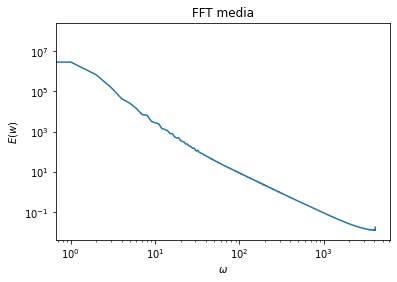

In [ ]:
plt.title("FFT media")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$E(w)$")

plt.plot(omega_interval,mean_sp,'-')

plt.xscale("log")
plt.yscale("log")

#plt.xlim(-0.1,9)

plt.show()